#License and Attribution

This notebook was developed by Emilio Serrano, Full Professor at the Department of Artificial Intelligence, Universidad Politécnica de Madrid (UPM), for educational purposes in UPM courses. Personal website: https://emilioserrano.faculty.bio/

📘 License: Creative Commons Attribution-NonCommercial-ShareAlike (CC BY-NC-SA)

You are free to: (1) Share — copy and redistribute the material in any medium or format; (2) Adapt — remix, transform, and build upon the material.

Under the following terms: (1) Attribution — You must give appropriate credit, provide a link to the license, and indicate if changes were made; (2) NonCommercial — You may not use the material for commercial purposes; (3) ShareAlike — If you remix, transform, or build upon the material, you must distribute your contributions under the same license as the original.

🔗 License details: https://creativecommons.org/licenses/by-nc-sa/4.0/

# Step-by-Step Guide for Using Word2Vec
Welcome to this notebook, a hands-on guide to understanding and applying Word2Vec, one of the most popular techniques in Natural Language Processing (NLP) for representing words as dense vectors.



###Setup and Imports

First, we need to install gensim and import Required Libraries


In [1]:
# Install the gensim library
!pip -q install gensim
!pip -q install scikit-learn
!pip -q install matplotlib

from gensim.models import Word2Vec, KeyedVectors
from gensim.test.utils import common_texts
import gensim.downloader as api
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

##Part 1: Using a Pre-Trained Word2Vec Model
Pre-trained Word2Vec models are available from Google and other sources. These models are trained on vast corpora like Google News or Wikipedia, allowing you to leverage the power of Word2Vec without training a model from scratch.

Use the gensim utility to download the word2vec-google-news-300 model, which is a pre-trained model on Google News. **It is over 1,5 GB, it can take a while**.

After running the code above, you can proceed with using the pretrained_model for word similarity tasks, word arithmetic, and other NLP operations.



In [2]:
# Download the 'word2vec-google-news-300' model using gensim downloader
pretrained_model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


### Get Word Vectors
After loading the pre-trained model, you can easily access the vector representation of any word in the vocabulary. For example, let's retrieve the vector for the word "king":

In [3]:
# Get the vector for the word "king"
king_vector = pretrained_model['king']

# Display the vector (300-dimensional vector)
print("Length of 'king' vector':\n", str(len(king_vector)))
print("Vector for 'king':\n", king_vector)


Length of 'king' vector':
 300
Vector for 'king':
 [ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  2.01416016e-02 -1.63085938e-01  1.35803223e-03
 -1.44531250e-01 -5.68847656e-02  4.296

###Find Similar Words
You can use the model to find the most similar words to a given word based on cosine similarity. Here's an example of finding words similar to "king":



In [4]:
# Find the top 10 words most similar to 'king'
similar_words = pretrained_model.most_similar('king', topn=10)
print("Top 10 words most similar to 'king':")
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

Top 10 words most similar to 'king':
kings: 0.7138046622276306
queen: 0.6510956287384033
monarch: 0.6413194537162781
crown_prince: 0.6204219460487366
prince: 0.6159993410110474
sultan: 0.5864824056625366
ruler: 0.5797566771507263
princes: 0.5646552443504333
Prince_Paras: 0.5432944297790527
throne: 0.5422105193138123


### Similarity Between Two Words
You can calculate the similarity between two words. For example, we can check how similar the words "king" and "queen" are:

In [ ]:
# Calculate similarity between 'king' and 'queen'
similarity_king_queen = pretrained_model.similarity('king', 'queen')
print(f"Similarity between 'king' and 'queen': {similarity_king_queen}")

### Word Arithmetic
Word2Vec supports arithmetic operations on word vectors. A classic example is:
* king − man ≈ X - woman
* king − man + woman ≈ X

This operation is used to: Find the word X that is to 'woman' as 'king' is to 'man'.  (which should ideally result in "X=queen").  



In [ ]:
# Word arithmetic: King - Man + Woman
result = pretrained_model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print("Result of 'king - man + woman':", result)

So, the code gives two positive words, one negative... and I am asking for the unknown negative.

More examples! (not always correct)

In [ ]:
result2 = pretrained_model.most_similar(positive=['france', 'rome'], negative=['paris'], topn=1)
print(f"Result of 'france - paris + rome' (What word is to Rome as France is to Paris?): {result2[0][0]}")

result3 = pretrained_model.most_similar(positive=['girl', 'man'], negative=['boy'], topn=1)
print(f"Result of 'girl - boy + man' (What word is to Man as Girl is to Boy?): {result3[0][0]}")

result5 = pretrained_model.most_similar(positive=['windows', 'google'], negative=['microsoft'], topn=1)
print(f"Result of 'windows - microsoft + google' (What word is to Google as Windows is to Microsoft?): {result5[0][0]}")

result6 = pretrained_model.most_similar(positive=['jungle', 'fish'], negative=['monkey'], topn=1)
print(f"Result of 'jungle - monkey + fish' (What word is to Fish as Jungle is to Monkey?): {result6[0][0]}")

###Visualize Word Vectors Using PCA
You can visualize the relationships between words by reducing their dimensionality from 300 dimensions to 2 dimensions using PCA (Principal Component Analysis). Here's an example of visualizing the words "king", "queen", "man", "woman", and some related terms:

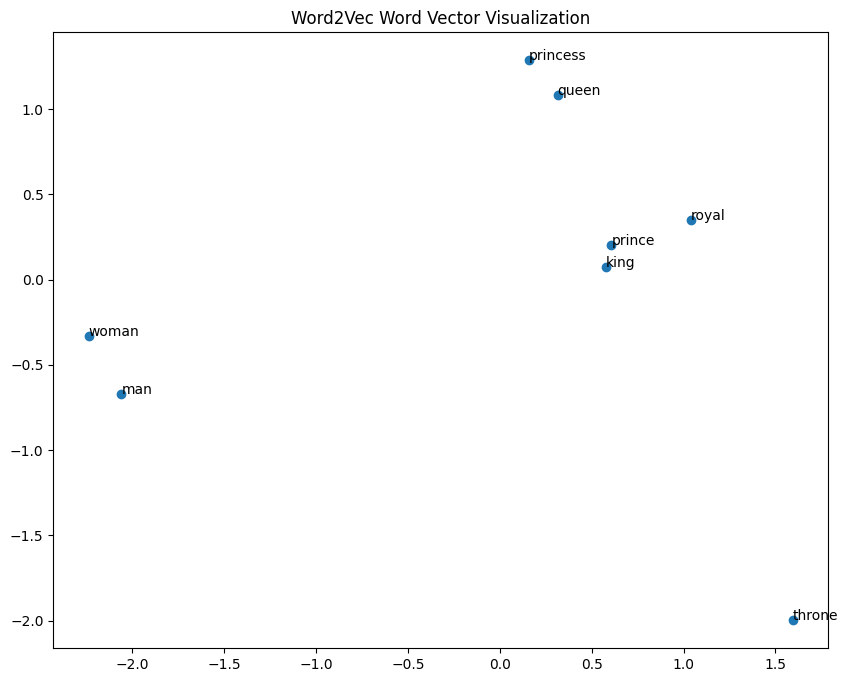

In [5]:
# Get word vectors for visualization
words = ['king', 'queen', 'man', 'woman', 'prince', 'princess', 'throne', 'royal']
vectors = [pretrained_model[word] for word in words]

# Reduce dimensionality to 2D using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# Plot the words in 2D space
plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1])

# Annotate each point with the word
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title('Word2Vec Word Vector Visualization')
plt.show()

###Check if a Word is in the Model's Vocabulary
Since pre-trained models only have vectors for words they were trained on, it's useful to check whether a word is in the vocabulary:

In [ ]:
# Check if 'gato' is in the model's vocabulary
word = 'gato'
if word in pretrained_model:
    print(f"'{word}' is in the vocabulary.")
else:
    print(f"'{word}' is NOT in the vocabulary.")

In [ ]:
similar_words = pretrained_model.most_similar('gato', topn=10)
print("Top 10 words most similar to 'gato':")
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

###Find Words that Don’t Match
You can use the model to identify the word that doesn’t match in a group of related words. For example, in the list ["breakfast", "lunch", "dinner", "cat"], the word "cat" is the odd one out.

In [ ]:
odd_word_out = pretrained_model.doesnt_match(['breakfast', 'lunch', 'dinner', 'cat'])
print(f"The word that doesn't match is: {odd_word_out}")

### Representing phrases

You can represent a corpus of phrases using the pre-trained Word2Vec model by averaging the word vectors for each phrase. This technique, known as "averaging word embeddings," can be used to create a vector representation for entire sentences or phrases.



In [7]:
%pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [nltk]2/3 [nltk]
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

# Example corpus of phrases
phrases = [
    "The cat sits on the mat",
    "The dog barks at the mailman",
    "Birds are flying in the sky",
    "The fish swims in the ocean"
]

# Function to get the vector representation of a phrase by averaging word vectors
def phrase_vector(phrase, model):
    words = word_tokenize(phrase.lower())  # Tokenize the phrase into words
    word_vectors = [model[word] for word in words if word in model]  # Get vectors for words in the model's vocabulary
    if word_vectors:
        return np.mean(word_vectors, axis=0)  # Average the word vectors
    else:
        return np.zeros(model.vector_size)  # Return a zero vector if no words are in the model

# Generate vector representations for each phrase
phrase_vectors = np.array([phrase_vector(phrase, pretrained_model) for phrase in phrases])

# Example: Show the vector for the first phrase "The cat sits on the mat"
print("Length of the vector for 'The cat sits on the mat':\n", len(phrase_vectors[0]))
print("Vector for 'The cat sits on the mat':\n", phrase_vectors[0])

Length of the vector for 'The cat sits on the mat':
 300
Vector for 'The cat sits on the mat':
 [ 0.03861491  0.04403178 -0.03222656  0.0994873   0.0111351  -0.06472778
  0.06837972 -0.11578369  0.11322021 -0.00362142 -0.03847249 -0.11287435
  0.0103658  -0.02075195 -0.03494263 -0.04117839 -0.01046753  0.12345377
 -0.04825846  0.02614339 -0.01062012  0.07543945 -0.12671025  0.04667918
  0.02563477 -0.06408691 -0.06713867  0.1985677   0.06143697 -0.07958984
 -0.04721069  0.0240008  -0.05359904  0.00123088  0.00165812 -0.08184814
 -0.07160187  0.06387329  0.06095886  0.06568527 -0.06722005 -0.07611084
  0.06774902 -0.02884928 -0.01798503 -0.0227712  -0.00979551 -0.0094401
  0.1274414  -0.06697591 -0.08247375  0.09726969  0.06026204 -0.06632487
  0.05810547  0.04960124  0.01615397 -0.08414713  0.15541585  0.01733398
 -0.05485026  0.03682454 -0.1184082  -0.04801432  0.02925619 -0.01646678
  0.02429199  0.02172852 -0.03003947  0.11417643  0.22806804 -0.03258769
  0.05151367 -0.01858266 -0.0

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/federicosvendsen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/federicosvendsen/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


##Part 2: Training a Custom Word2Vec Model
 Next, we'll train a custom Word2Vec model on a simple dataset to demonstrate the training process.



###Prepare the Text Corpus

For training a Word2Vec model, we need a text corpus. In this example, we'll use a set of simple sentences. In a real-world scenario, you would use a much larger dataset.


In [ ]:
# Example text corpus
corpus = [
    'The cat sits on the mat',
    'The dog plays in the park',
    'The girl runs in the garden',
    'The man reads a book in the library',
    'The sun shines in the blue sky',
    'The car drives on the road',
    'The flower grows in the garden',
    'Birds fly over the trees',
]

# Simple preprocessing (tokenization)
sentences = [sentence.lower().split() for sentence in corpus]
print(sentences)

[['the', 'cat', 'sits', 'on', 'the', 'mat'], ['the', 'dog', 'plays', 'in', 'the', 'park'], ['the', 'girl', 'runs', 'in', 'the', 'garden'], ['the', 'man', 'reads', 'a', 'book', 'in', 'the', 'library'], ['the', 'sun', 'shines', 'in', 'the', 'blue', 'sky'], ['the', 'car', 'drives', 'on', 'the', 'road'], ['the', 'flower', 'grows', 'in', 'the', 'garden'], ['birds', 'fly', 'over', 'the', 'trees']]


### Train the Word2Vec Model
Now, let's train the Word2Vec model using our tokenized corpus. We'll adjust some of the key parameters such as vector size (dimension), window size, and the number of epochs.

In [ ]:
# Train the Word2Vec model
custom_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4, epochs=100)

# Display the words in the vocabulary
print(custom_model.wv.index_to_key)

###Find Similar Words Using the Custom Model
We can now find words similar to a specific word in our custom-trained model. For example, finding words most similar to "cat":

In [ ]:
# Find words similar to "cat"
similar_words_custom = custom_model.wv.most_similar('cat', topn=5)
print("Words similar to 'cat':", similar_words_custom)

###Perform Word Arithmetic with the Custom Model
Let's perform a word arithmetic operation using our custom-trained model:



In [ ]:
# Word arithmetic: Dog + Mat - Park
result_custom = custom_model.wv.most_similar(positive=['dog', 'mat'], negative=['park'], topn=1)
print("Result of 'dog + mat - park':", result_custom)

###Save and Load the Trained Model

 You can save the trained model to use it later or load a previously saved model.



In [ ]:
# Save the model
custom_model.save("custom_word2vec_model.model")

# Load the model
loaded_custom_model = Word2Vec.load("custom_word2vec_model.model")

#Conclusion and Next Steps
This script provides a comprehensive demonstration of using Word2Vec with the gensim library in Python, covering both the use of a pre-trained model and training a custom model from scratch using a user-defined corpus.

Key Takeaways:
- Word2Vec allows us to represent words as dense, meaningful vectors that capture semantic relationships.

- Pre-trained models like Google News Word2Vec offer powerful embeddings trained on large corpora and are suitable for many downstream tasks out-of-the-box.

- Training your own Word2Vec model gives you more control and domain-specific representations, which can improve performance in specialized applications (e.g., legal, medical, or technical texts).

- You’ve learned how to explore word similarities, analogies (e.g., “king - man + woman ≈ queen”), and visualize high-dimensional embeddings.

Next Steps:

- Evaluate embeddings: Try using your word vectors in downstream tasks such as text classification, clustering, or similarity-based recommendation.

- Fine-tune hyperparameters: Experiment with dimensions (vector_size), window size, negative sampling, and training epochs to improve embedding quality.

- Use embeddings in deep learning: Plug your trained embeddings into LSTM, GRU, or Transformer models in TensorFlow or PyTorch.

- Explore alternatives: Try more recent embeddings like contextual embeddings from models like BERT for deeper semantic understanding.

This notebook serves as a solid foundation for anyone beginning their journey into word embeddings and distributional semantics.

BY FEDE: Download "El quijote" and train based on it

In [26]:
%pip install tqdm
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 16.1 MB/s  0:00:00 eta 0:00:01
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]
Note: you may need to restart the kernel to use updated packages.


In [23]:
with open('6d6c69398cb0c73111e49f1218960f79/el_quijote.txt', 'r') as f:
    raw_txt = f.read()  # Reads the whole file as a single string

In [40]:
import re
from gensim.models import Word2Vec
from tqdm import tqdm

tqdm.pandas()

import nltk
nltk.download('punkt')  #
nltk.download('stopwords')  #

from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('spanish'))


def preprocessing(titles_array):

    """
    Take in an array of titles, and return the processed titles.

    (e.g. input: 'i am a boy', output - 'am boy')  -> since I remove those words with length 1
    """

    processed_array = []

    for title in tqdm(titles_array):
        # remove other non-alphabets symbols with space (i.e. keep only alphabets and whitespaces).
        processed = re.sub('[^a-zA-Z ]', '', title)

        words = processed.split()

        # keep words that have length of more than 1 (e.g. gb, bb), remove those with length 1.
        processed_array.append((' '.join([word for word in words if len(word) > 1])).split())

    return processed_array

# Let's remove stopwords from tokens. The `stopwords` package from the 'nltk.corpus' is used.
def clean_text(sentence):
    if len(sentence) == 0:
        return [""]

    words = sentence.lower().split(" ")
    filtered_tokens = [word for word in words if word not in stop_words or len(word) > 1]  # remove stopwords
    # Rebuild string and return wrapped in list
    return [" ".join(filtered_tokens)]

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/federicosvendsen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/federicosvendsen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
train_sentences=[]
sentences = raw_txt.split('\n')
# Leer cada archivo en la lista
for sentence in sentences:
    cleaned_sentences = clean_text(sentence)
    result = preprocessing(cleaned_sentences)
    train_sentences.extend(result)

100%|██████████| 1/1 [00:00<00:00, 50533.78it/s]


In [42]:
model = Word2Vec(sentences=train_sentences,
                 sg=0,
                 vector_size=400,
                 workers=4,
                 epochs=6

                 )

let´s look into it

In [43]:
print(model.wv.index_to_key)

['que', 'de', 'la', 'el', 'en', 'no', 'se', 'los', 'con', 'por', 'su', 'lo', 'le', 'las', 'como', 'mas', 'del', 'me', 'si', 'don', 'es', 'mi', 'yo', 'un', 'dijo', 'quijote', 'al', 'porque', 'tan', 'para', 'sancho', 'habia', 'ni', 'sin', 'todo', 'una', 'asi', 'esta', 'bien', 'ser', 'esto', 'sus', 'era', 'pues', 'ha', 'vuestra', 'respondio', 'pero', 'todos', 'quien', 'cual', 'ya', 'este', 'senor', 'donde', 'merced', 'cuando', 'ella', 'fue', 'caballero', 'te', 'sino', 'hacer', 'aquel', 'dos', 'muy', 'tu', 'otra', 'cosa', 'estaba', 'aunque', 'decir', 'alli', 'mal', 'otro', 'tanto', 'he', 'cura', 'senora', 'nos', 'luego', 'poco', 'aquella', 'aqui', 'os', 'tenia', 'ver', 'aun', 'hasta', 'alguna', 'manera', 'verdad', 'ahora', 'dios', 'vida', 'buen', 'padre', 'ellos', 'buena', 'sobre', 'les', 'tengo', 'hay', 'parte', 'son', 'dicho', 'cosas', 'lugar', 'uno', 'solo', 'tal', 'mis', 'tiempo', 'mundo', 'dar', 'entre', 'puesto', 'toda', 'tiene', 'todas', 'amo', 'estas', 'menos', 'digo', 'mucho', 'es

In [47]:
# Find words similar to "cat"
similar_words_custom = model.wv.most_similar('rocinante', topn=5)
print("Words similar to 'cat':", similar_words_custom)

Words similar to 'cat': [('vizcaino', 0.999296247959137), ('volvio', 0.9989030957221985), ('conocio', 0.9988325238227844), ('viendo', 0.9987014532089233), ('pasaba', 0.9985129237174988)]


In [53]:
# Word arithmetic: Dog + Mat - Park
result_custom = model.wv.most_similar(positive=['rocinante', 'sancho'], negative=['quijote'], topn=1)
print(f"Result of 'sancho - rocinante + quijote' (What word is to Sancho as Rocinante is to Quijote?): {result_custom[0][0]}")

Result of 'sancho - rocinante + quijote' (What word is to Sancho as Rocinante is to Quijote?): calla
